In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import os


## Merging Data

In [2]:
w_3 = pd.read_csv(r"C:\Users\Dell\Downloads\water_project\pixels_df_1.csv")
w_6_1= pd.read_csv(r"C:\Users\Dell\Downloads\water_project\pixels_df_2.csv")
w_6_2 = pd.read_csv(r"C:\Users\Dell\Downloads\water_project\pixels_df_3.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_6480\3833984767.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  w_6_1= pd.read_csv(r"C:\Users\Dell\Downloads\water_project\pixels_df_2.csv")
C:\Users\Dell\AppData\Local\Temp\ipykernel_6480\3833984767.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  w_6_2 = pd.read_csv(r"C:\Users\Dell\Downloads\water_project\pixels_df_3.csv")


In [3]:
w_6_orig = pd.concat([w_6_1, w_6_2])
w_6 = w_6_orig.copy()
w_3_orig = w_3.copy()


In [4]:
w_6.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,01/01/2019,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
1,1403,1266,192,177,218,01/01/2019,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
2,1403,1267,192,177,218,01/01/2019,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
3,1403,1268,190,178,218,01/01/2019,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
4,1403,1269,190,178,218,01/01/2019,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o


In [5]:
def wrangle_data(df):
    # remove duplicate RGB
    df = df.drop_duplicates()
    df["date"] = pd.to_datetime(df["date"])
    df["temperature"] = df.temperature.apply(lambda a: float(a[:-1]) if type(a) != float else np.nan)
    return df

def pick_samples(df):
    sampled_df = df.head(1)
    max_class_size = 100
    for date in df.orig_name.unique():
        date_grouped = df[df.orig_name==date]
        nth = len(date_grouped)//max_class_size
        if nth==0:
            sampled_df = pd.concat([sampled_df,date_grouped])
        else:
            curr_group = date_grouped.iloc[::nth,:]
            sampled_df = pd.concat([sampled_df,curr_group])
    return sampled_df
def split_fit_basic_report(df):
    X = df.drop('class',axis=1)
    y = df['class'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
    rfc = RandomForestClassifier(random_state = 1)
    rfc.fit(X_train, y_train)
    # predict on test data
    rfc_pred = rfc.predict(X_test)
    print(classification_report(y_test,rfc_pred))
    feature_val = pd.DataFrame(rfc.feature_importances_, index = X_train.columns)
    print(feature_val.sort_values(0, ascending=False))
    return rfc, rfc_pred,feature_val,  X_train, X_test, y_train, y_test

def plot_cm(y_test, rfc_pred):
    p,ax = plt.subplots(figsize=(18, 10))

    ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred, ax=ax, colorbar=True)
    plt.show()


In [6]:
w_6 = wrangle_data(w_6)
w_3 = wrangle_data(w_3)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11732\1587573484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
C:\Users\Dell\AppData\Local\Temp\ipykernel_11732\1587573484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temperature"] = df.temperature.apply(lambda a: float(a[:-1]) if type(a) != float else np.nan)


In [8]:
merged = pd.concat([w_6,w_3])
merged.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
1,1403,1266,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
2,1403,1267,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
3,1403,1268,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
4,1403,1269,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o


In [ ]:
merged.shape

In [10]:
merged.to_csv("merged.csv", index=False)

In [4]:
sample_merged = pick_samples(merged)
sample_merged.shape

(34177, 11)

In [5]:
sample_merged.to_csv("sample_merged.csv", index=False)

In [2]:
merged = pd.read_csv("merged.csv")

In [11]:
sample_merged = pd.read_csv("sample_merged.csv")

In [5]:
sample_merged.describe()

,x,y,R,G,B,temperature
count,34177.000000,34177.000000,34177.000000,34177.000000,34177.000000,23353.000000
mean,1229.140270,1729.387746,131.806420,121.492553,128.556134,35.247120
std,376.924503,327.388308,78.530278,79.799760,93.328750,12.429984
min,47.000000,1234.000000,0.000000,0.000000,0.000000,12.000000
25%,1036.000000,1439.000000,58.000000,47.000000,38.000000,28.000000
50%,1267.000000,1608.000000,125.000000,110.000000,104.000000,33.000000
75%,1489.000000,2074.000000,202.000000,194.000000,230.000000,41.000000
max,1997.000000,2336.000000,255.000000,255.000000,255.000000,98.000000


<AxesSubplot:>

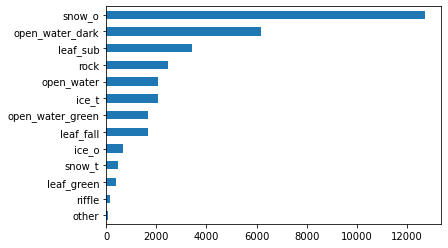

In [6]:
sample_merged["class"].value_counts().sort_values(ascending=True).plot(kind="barh")

In [12]:
sample_copy = sample_merged.copy()
sample_merged = sample_merged.dropna()
sample_merged.shape

(23267, 15)

<AxesSubplot:>

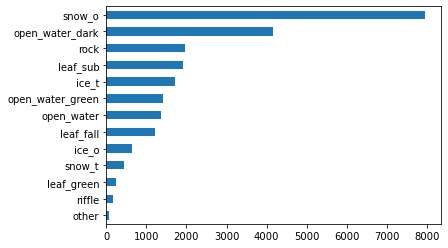

In [10]:
sample_merged["class"].value_counts().sort_values(ascending=True).plot(kind="barh")

In [6]:
w_6.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
1,1403,1266,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
2,1403,1267,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
3,1403,1268,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
4,1403,1269,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o


<AxesSubplot:>

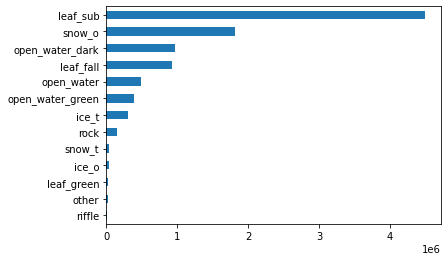

In [9]:
w_6["class"].value_counts().sort_values(ascending=True).plot(kind="barh")

<AxesSubplot:>

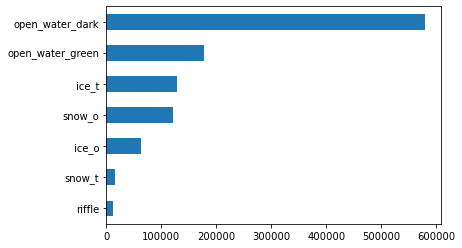

In [10]:
w_3["class"].value_counts().sort_values(ascending=True).plot(kind="barh")

## Train and Test on w6

In [12]:
# train and test on w6
w_6.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
3,1403,1268,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
6,1403,1271,189,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
7,1403,1272,190,179,219,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
8,1403,1273,191,180,220,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o


In [16]:
w_6.head().temperature.apply(lambda a:a[:-1])

0    35
1    35
2    35
3    35
4    35
Name: temperature, dtype: object

### Train only using RGB

In [13]:
w_6_train = w_6[["R","G","B", "class"]]


In [14]:
# imbalanced classes, is an issue
w_6_train["class"].value_counts()

leaf_fall           113695
leaf_sub             54657
rock                 33001
open_water           19778
ice_t                17787
snow_o               12429
leaf_green            8992
open_water_green      7516
open_water_dark       7277
other                 3628
riffle                3594
ice_o                 2353
snow_t                1841
Name: class, dtype: int64

In [15]:
X = w_6_train.drop('class',axis=1)
y = w_6_train['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# stratify - keeps the same proportion 

In [16]:
# fit model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# predict on test data
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.6579421248796014

In [18]:
print(classification_report(y_test,rfc_pred))

                  precision    recall  f1-score   support

           ice_o       0.34      0.20      0.25      1177
           ice_t       0.59      0.71      0.64      8893
       leaf_fall       0.78      0.85      0.82     56847
      leaf_green       0.59      0.54      0.56      4496
        leaf_sub       0.57      0.51      0.54     27329
      open_water       0.52      0.50      0.51      9889
 open_water_dark       0.58      0.56      0.57      3639
open_water_green       0.46      0.40      0.43      3758
           other       0.31      0.12      0.17      1814
          riffle       0.36      0.28      0.31      1797
            rock       0.50      0.49      0.50     16501
          snow_o       0.82      0.86      0.84      6214
          snow_t       0.32      0.17      0.22       920

        accuracy                           0.66    143274
       macro avg       0.52      0.48      0.49    143274
    weighted avg       0.65      0.66      0.65    143274



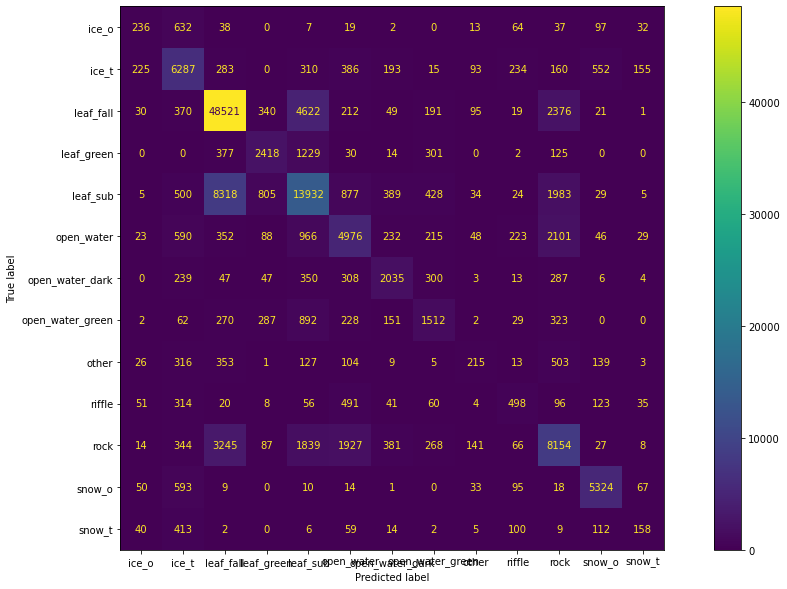

In [19]:
p,ax = plt.subplots(figsize=(18, 10))

ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred, ax=ax, colorbar=True)
plt.show()

In [20]:
pd.DataFrame(rfc.feature_importances_, index = X_train.columns)

,0
R,0.338431
G,0.278765
B,0.382804


Poor perforamnce, resample data and train using grid search

only using RGB

In [21]:
w_6.orig_name.value_counts()

Hbwtr_w6_20181013_120459.JPG    34063
Hbwtr_w6_20181014_120456.JPG    21922
Hbwtr_w6_20181016_120450.JPG    16894
Hbwtr_w6_20181021_115934.JPG    14114
Hbwtr_w6_20181023_115928.JPG    10771
                                ...  
Hbwtr_w6_20190309_120109.JPG        4
Hbwtr_w6_20190227_120103.JPG        3
Hbwtr_w6_20190328_120615.JPG        3
Hbwtr_w6_20191221_115858.JPG        3
Hbwtr_w6_20190313_120110.JPG        2
Name: orig_name, Length: 176, dtype: int64

In [22]:
# sample max=100 and min=2 points from all images
sampled_df = w_6.head(1)
max_class_size = 10
li = []
for date in w_6.orig_name.unique():
    date_grouped = w_6[w_6.orig_name==date]
    nth = len(date_grouped)//max_class_size
    if nth==0:
        sampled_df = pd.concat([sampled_df,date_grouped])
    else:
        curr_group = date_grouped.iloc[::nth,:]
        sampled_df = pd.concat([sampled_df,curr_group])
    li.append(nth)
    # print(nth, len(date_grouped))

In [23]:
sampled_df.shape, w_6.shape

((1912, 11), (286548, 11))

imbalanced class, issue

In [55]:
# train split resampled

df_1 = sampled_df[["R","G","B", "class"]]
X = df_1.drop('class',axis=1)
y = df_1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1, stratify=y)

In [56]:
# run them default
# fit model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predict on test data
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

                  precision    recall  f1-score   support

           ice_o       0.00      0.00      0.00         9
           ice_t       0.47      0.45      0.46        69
       leaf_fall       0.59      0.63      0.61       103
      leaf_green       0.65      0.88      0.75        25
        leaf_sub       0.39      0.33      0.36        90
      open_water       0.36      0.38      0.37        52
 open_water_dark       0.60      0.64      0.62        39
open_water_green       0.00      0.00      0.00         7
           other       0.00      0.00      0.00        10
          riffle       1.00      0.33      0.50         6
            rock       0.40      0.45      0.42       103
          snow_o       0.88      0.94      0.90       233
          snow_t       0.00      0.00      0.00        19

        accuracy                           0.60       765
       macro avg       0.41      0.39      0.38       765
    weighted avg       0.57      0.60      0.58       765



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 100-> 0.65
# 1,000 ->0.63
# 10,000->0.65

 Now, grid search

In [51]:
n_cpus = os.cpu_count()
# grid search create dict
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 10, cv = 5,
                               verbose=3,
                               random_state=42, n_jobs = n_cpus-1,
                               scoring = "accuracy")

In [52]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=7,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, scoring='accuracy', verbose=3)

In [53]:
rf_random.best_params_

{'n_estimators': 1135,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [57]:
# training error
print (rf_random.score(X_train, y_train))
# testing error
print(rf_random.score(X_test, y_test))

0.9616390584132519
0.6222222222222222


In [60]:
# build up on the randomized cv search and find better params

param_grid = {
    'n_estimators': np.linspace(1100, 1300, 5, dtype = int),
    'max_depth': [8,10,12,15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Base model
rf_grid = RandomForestClassifier(criterion = 'gini', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = n_cpus-1, verbose = 3)


In [61]:
grid_rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=7,
             param_grid={'max_depth': [8, 10, 12, 15],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([1100, 1150, 1200, 1250, 1300])},
             verbose=3)

In [62]:
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1100}

In [64]:
# training error
print (grid_rf_search.score(X_train, y_train))
# testing error
print(grid_rf_search.score(X_test, y_test))

1.0
0.6130718954248366


In [ ]:
pd.DataFrame(best_rf_grid.feature_importances_, index = X_train.columns)

Max accuracy found 62%.

### Train using RGB, x, y and temp on W6

In [11]:
w_6.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
1,1403,1266,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
2,1403,1267,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
3,1403,1268,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
4,1403,1269,190,178,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o


In [7]:
sample_merged.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
1,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
2,1407,1294,186,175,215,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
3,1412,1290,194,183,223,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
4,1417,1286,188,180,219,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o


In [12]:
train_w6_2 = pick_samples(w_6)
train_w6_2 = train_w6_2[["x","y","R","G","B", "temperature", "class"]]
train_w6_2.shape

(26603, 7)

In [11]:
sample_merged.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
1,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
2,1407,1294,186,175,215,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
3,1412,1290,194,183,223,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o
4,1417,1286,188,180,219,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35.0,snow_o


In [31]:
sampled_df.shape

(26603, 11)

In [13]:
train_w6_2.shape

(26603, 7)

In [26]:
train_w6_2=train_w6_2.dropna()
rfc, rfc_pred,feature_val,  X_train, X_test, y_train, y_test = split_fit_basic_report(train_w6_2)

                  precision    recall  f1-score   support

           ice_o       0.89      0.57      0.70        54
           ice_t       0.81      0.79      0.80       310
       leaf_fall       0.87      0.76      0.81       365
      leaf_green       0.95      0.78      0.86        77
        leaf_sub       0.80      0.88      0.84       577
      open_water       0.79      0.81      0.80       412
 open_water_dark       0.86      0.93      0.89       487
open_water_green       0.83      0.57      0.68        70
           other       1.00      0.29      0.45        17
          riffle       0.73      0.42      0.53        19
            rock       0.89      0.90      0.90       591
          snow_o       0.98      0.99      0.98      2232
          snow_t       0.90      0.66      0.76       106

        accuracy                           0.90      5317
       macro avg       0.87      0.72      0.77      5317
    weighted avg       0.90      0.90      0.90      5317

           

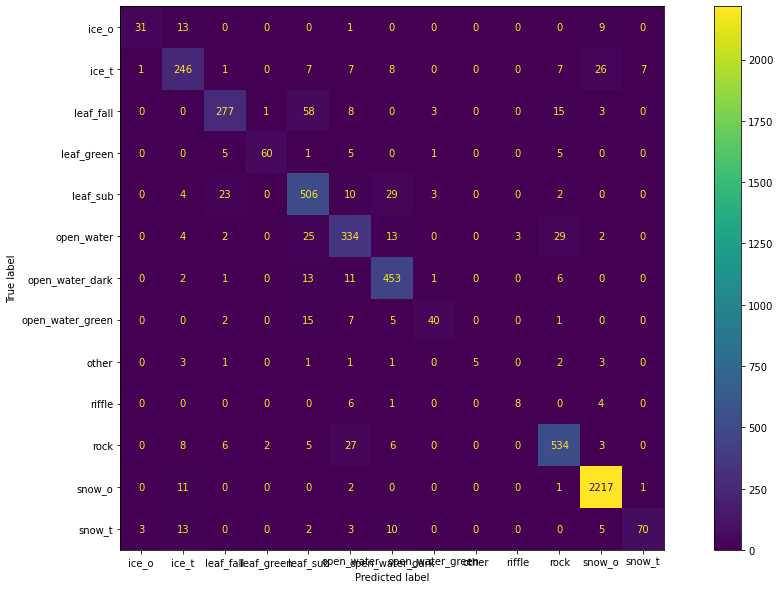

In [18]:
plot_cm(y_test, rfc_pred)

 Max accuracy found - 0.9
 
 Use Grid search for best paramters

In [28]:
n_cpus = os.cpu_count()
# grid search create dict
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 50, cv = 3,
                               verbose=4,
                               random_state=42, n_jobs = n_cpus-1,
                               scoring = "accuracy")

In [29]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=7,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, scoring='accuracy', verbose=4)

In [30]:
rf_random.best_params_

{'n_estimators': 2378,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 100,
 'criterion': 'gini',
 'bootstrap': False}

In [32]:
# training error
print (rf_random.score(X_train, y_train))
# testing error
print(rf_random.score(X_test, y_test))

1.0
0.902388564980252


In [33]:
# build up on the randomized cv search and find better params

param_grid = {
    'n_estimators': np.linspace(2350, 2400, 5, dtype = int),
    'max_depth': [50,70,100,110, 120],
    'min_samples_split': [4,5,6],
    'min_samples_leaf': [1, 2]
}

# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = n_cpus-1, verbose = 3)


In [ ]:
grid_rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [62]:
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1100}

In [64]:
# training error
print (grid_rf_search.score(X_train, y_train))
# testing error
print(grid_rf_search.score(X_test, y_test))

1.0
0.6130718954248366


In [ ]:
pd.DataFrame(best_rf_grid.feature_importances_, index = X_train.columns)

## Tran and test using W3

### Train only using RGB

In [78]:
w_3["date"] = pd.to_datetime(w_3["date"])
w_3 = w_3.dropna()
w_3 = w_3.drop_duplicates()
w_3.shape

(813257, 11)

In [84]:
w_3 = w_3[["R","G","B", "class"]]
w_3

,R,G,B,class
0,30,32,47,open_water_dark
1,20,22,37,open_water_dark
2,15,17,32,open_water_dark
3,16,18,33,open_water_dark
4,18,21,30,open_water_dark
...,...,...,...,...
1102364,131,132,98,open_water_green
1102365,122,124,85,open_water_green
1102366,135,138,95,open_water_green
1102367,154,157,110,open_water_green


In [85]:
X = w_3.drop('class',axis=1)
y = w_3['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [86]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
rfc_pred = rfc.predict(X_test)


In [88]:
print(classification_report(y_test,rfc_pred))


                  precision    recall  f1-score   support

           ice_o       0.84      0.89      0.87     19334
           ice_t       0.78      0.74      0.76     28896
 open_water_dark       0.83      0.90      0.86    118873
open_water_green       0.77      0.62      0.69     45118
          riffle       0.79      0.80      0.80      4009
          snow_o       0.96      0.98      0.97     23097
          snow_t       0.68      0.51      0.58      4651

        accuracy                           0.83    243978
       macro avg       0.81      0.78      0.79    243978
    weighted avg       0.82      0.83      0.82    243978



In [30]:
w_6.orig_name.value_counts()

Hbwtr_w6_20181013_120459.JPG    34063
Hbwtr_w6_20181014_120456.JPG    21922
Hbwtr_w6_20181016_120450.JPG    16894
Hbwtr_w6_20181021_115934.JPG    14114
Hbwtr_w6_20181023_115928.JPG    10771
                                ...  
Hbwtr_w6_20190309_120109.JPG        4
Hbwtr_w6_20190227_120103.JPG        3
Hbwtr_w6_20190328_120615.JPG        3
Hbwtr_w6_20191221_115858.JPG        3
Hbwtr_w6_20190313_120110.JPG        2
Name: orig_name, Length: 176, dtype: int64

In [83]:
sampled_df.head()

,x,y,R,G,B,date,time,orig_name,watershed,temperature,class
0,1403,1265,192,177,218,2019-01-01,11:59:47,Hbwtr_w6_20190101_115947.JPG,w6,35F,snow_o
16153,1094,1352,31,18,35,2019-01-02,11:59:44,Hbwtr_w6_20190102_115944.JPG,w6,26F,open_water_dark
84181,976,1369,57,38,42,2019-01-07,11:59:28,Hbwtr_w6_20190107_115928.JPG,w6,21F,open_water_dark
98474,1128,1499,163,158,199,2019-01-08,12:04:25,Hbwtr_w6_20190108_120425.JPG,w6,23F,snow_o
126166,1067,1400,202,190,228,2019-01-10,11:59:18,Hbwtr_w6_20190110_115918.JPG,w6,26F,snow_o


In [31]:
df_1  = w_6[["R","G","B", "class"]]
df_1= df_1.fillna(value=np.nan)
df_1 = df_1.dropna()
# no x and y
df_1 = df_1.drop_duplicates()

In [28]:
# Train test split
from sklearn.model_selection import train_test_split
X = df_1.drop('class',axis=1)
y = df_1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

In [29]:
X_train.shape

(242355, 3)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

rfc = RandomForestClassifier(n_estimators=100,
                            # max_depth = 8,
                            max_samples = 0.5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5)

In [50]:
# predict on test data
rfc_pred = rfc.predict(X_test)

In [51]:
print(classification_report(y_test,rfc_pred))

                  precision    recall  f1-score   support

           ice_o       0.11      0.09      0.10      6475
           ice_t       0.26      0.29      0.27     32756
       leaf_fall       0.47      0.50      0.48    167040
      leaf_green       0.16      0.10      0.12      9995
        leaf_sub       0.31      0.34      0.33    160969
      open_water       0.09      0.09      0.09     45820
 open_water_dark       0.08      0.07      0.07     21134
open_water_green       0.05      0.04      0.05     30847
           other       0.10      0.06      0.07     10220
          riffle       0.26      0.20      0.23      7805
            rock       0.17      0.16      0.17     46946
          snow_o       0.56      0.63      0.59     15179
          snow_t       0.06      0.05      0.06     10311

        accuracy                           0.31    565497
       macro avg       0.21      0.20      0.20    565497
    weighted avg       0.30      0.31      0.30    565497



In [18]:
cm = confusion_matrix(y_test,rfc_pred)

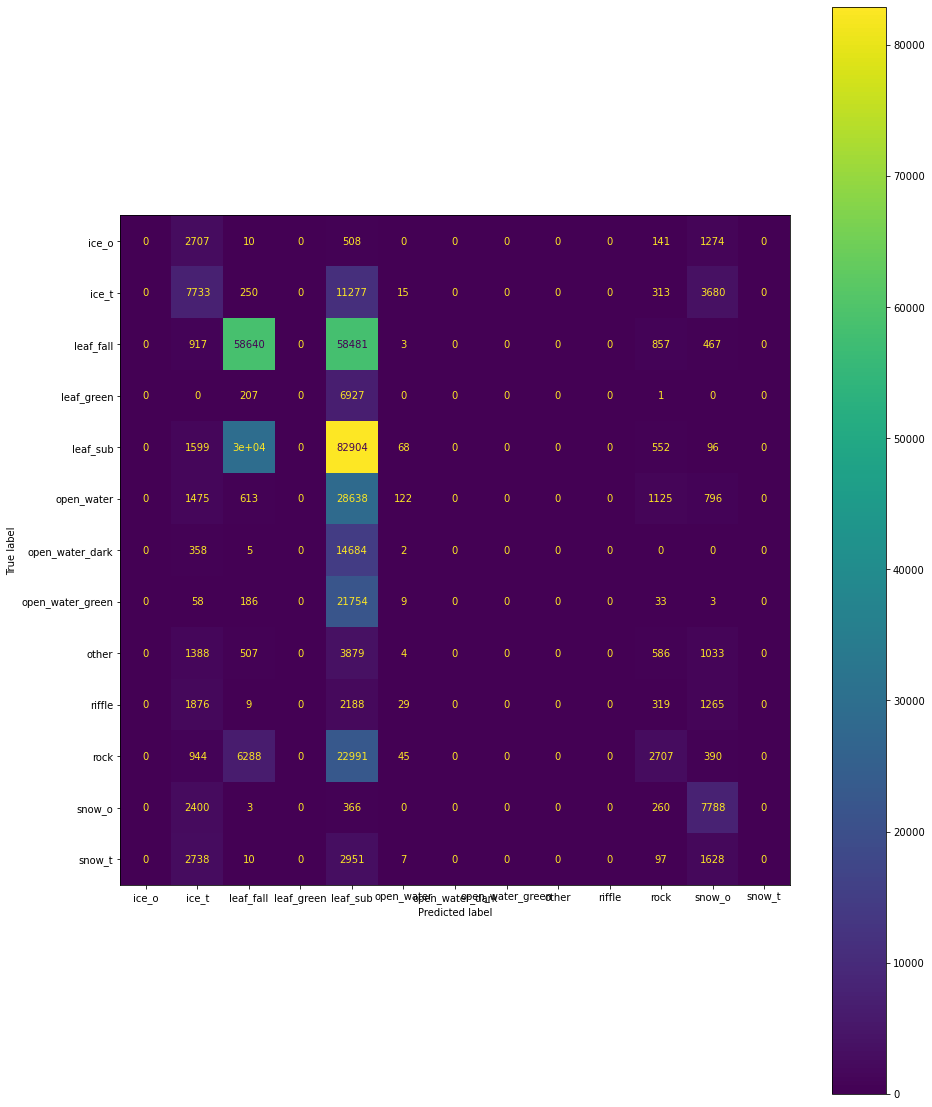

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
p,ax = plt.subplots(figsize=(15, 20))

ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred, ax=ax)
plt.show()

In [59]:
# train on w6_1 and try
df_2  = w_6_1[["x", "y","R","G","B", "class"]]
df_2= df_2.fillna(value=np.nan)
df_2 = df_2.dropna()
# no x and y
df_2 = df_2.drop_duplicates()

In [60]:
X = df_2.drop('class',axis=1)
y = df_2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfc = RandomForestClassifier(n_estimators=100)
                            # max_depth = 8,
                            # max_samples = 0.5)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [61]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

                  precision    recall  f1-score   support

           ice_o       0.99      0.98      0.99      3342
           ice_t       0.99      0.98      0.98      9793
       leaf_fall       0.99      0.98      0.98     16595
      leaf_green       0.99      0.99      0.99      6018
        leaf_sub       0.98      0.97      0.97      7580
      open_water       0.97      0.98      0.98     50395
 open_water_dark       0.98      0.98      0.98     26924
open_water_green       0.97      0.96      0.96       645
           other       0.99      0.87      0.93      1338
          riffle       0.98      0.89      0.93      1781
            rock       0.98      0.98      0.98     47625
          snow_o       1.00      1.00      1.00    345715
          snow_t       0.99      0.97      0.98      2386

        accuracy                           0.99    520137
       macro avg       0.99      0.96      0.97    520137
    weighted avg       0.99      0.99      0.99    520137



In [64]:
df_3 =  w_6_2[["x", "y","R","G","B", "class"]]
df_3= df_3.fillna(value=np.nan)
df_3 = df_3.dropna()
# no x and y
df_3 = df_3.drop_duplicates()
X_2 = df_2.drop('class',axis=1)
y_2 = df_2['class']
rfc_pred_2 = rfc.predict(X_2)


In [ ]:
print(classification_report(y_2,rfc_pred_2))

In [ ]:
# classes choose-condensing , pixels sampling, ice coverage

In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Train on merged file

In [20]:
sample_merged.describe()

,x,y,R,G,B,temperature
count,23267.000000,23267.000000,23267.000000,23267.000000,23267.000000,23267.000000
mean,1217.336399,1738.367774,128.330812,118.031719,125.603344,35.255426
std,383.700466,327.797687,76.529363,77.527020,90.200962,12.441302
min,59.000000,1234.000000,0.000000,0.000000,0.000000,12.000000
25%,1026.000000,1444.000000,57.000000,46.000000,39.000000,28.000000
50%,1258.000000,1623.000000,123.000000,109.000000,104.000000,33.000000
75%,1480.000000,2079.000000,195.000000,186.000000,222.000000,41.000000
max,1997.000000,2336.000000,255.000000,255.000000,255.000000,98.000000


                  precision    recall  f1-score   support

           ice_o       0.93      0.86      0.89       191
           ice_t       0.83      0.81      0.82       516
       leaf_fall       0.90      0.80      0.85       365
      leaf_green       0.88      0.88      0.88        77
        leaf_sub       0.82      0.81      0.82       577
      open_water       0.80      0.78      0.79       412
 open_water_dark       0.84      0.93      0.88      1250
open_water_green       0.85      0.71      0.77       421
           other       1.00      0.24      0.38        17
          riffle       0.94      0.66      0.78        47
            rock       0.88      0.94      0.91       591
          snow_o       0.98      0.99      0.99      2384
          snow_t       0.89      0.64      0.75       133

        accuracy                           0.89      6981
       macro avg       0.89      0.77      0.81      6981
    weighted avg       0.89      0.89      0.89      6981

           

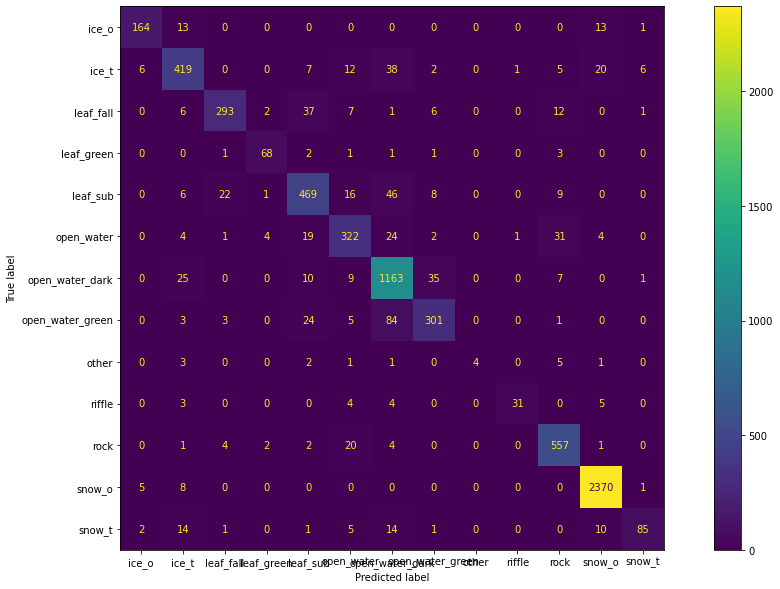

In [6]:
# using x,y,RGB, temp
train_merged = sample_merged[["x","y","R","G","B", "temperature", "class"]]
rfc, rfc_pred,feature_val,  X_train, X_test, y_train, y_test = split_fit_basic_report(train_merged)
plot_cm(y_test, rfc_pred)

In [8]:
n_cpus = os.cpu_count()
# grid search create dict
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 10, cv = 5,
                               verbose=4,
                               random_state=42, n_jobs = n_cpus-1,
                               scoring = "accuracy")

In [11]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=7,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, scoring='accuracy', verbose=4)

In [12]:
rf_random.best_params_

{'n_estimators': 928,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': False}

In [13]:
# training error
print (rf_random.score(X_train, y_train))
# testing error
print(rf_random.score(X_test, y_test))

0.988947562323468
0.8871221887981664


In [9]:
# build up on the randomized cv search and find better params

param_grid = {
    'n_estimators': np.linspace(920, 950, 10, dtype = int),
    'max_depth': [30, 50],
    'min_samples_split': [10,12],
    'min_samples_leaf': [1, 2]
}

# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = False)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 2, n_jobs = n_cpus-1, verbose = 3)


In [10]:
grid_rf_search.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy'),
             n_jobs=7,
             param_grid={'max_depth': [30, 50], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': array([920, 923, 926, 930, 933, 936, 940, 943, 946, 950])},
             verbose=3)

In [13]:
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 950}

In [14]:
# training error
print (grid_rf_search.score(X_train, y_train))
# testing error
print(grid_rf_search.score(X_test, y_test))

0.995333415203242
0.8897006159575992


In [19]:
pd.DataFrame(best_rf_grid.feature_importances_, index = ["x","y","R","G","B","temperature"])

,0
x,0.112377
y,0.162020
R,0.159875
G,0.151591
B,0.301172
temperature,0.112966


In [ ]:
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)
sample_merged.date = pd.to_datetime(sample_merged.date)
sample_merged.time = pd.to_datetime(sample_merged.time)
sample_merged["year"] = sample_merged.date.dt.year
sample_merged["week"] =sample_merged.date.dt.isocalendar().week
sample_merged["month"] = sample_merged.date.dt.month
sample_merged["season"] = sample_merged.date.apply(lambda x: get_season(x))

## Final Model
using RGB, + year, week of day, season variables

                  precision    recall  f1-score   support

           ice_o       0.95      0.93      0.94       191
           ice_t       0.92      0.91      0.91       516
       leaf_fall       0.92      0.90      0.91       365
      leaf_green       0.95      0.91      0.93        77
        leaf_sub       0.91      0.95      0.93       577
      open_water       0.92      0.93      0.93       412
 open_water_dark       0.93      0.97      0.95      1250
open_water_green       0.94      0.85      0.89       421
           other       1.00      0.41      0.58        17
          riffle       0.91      0.85      0.88        47
            rock       0.97      0.97      0.97       591
          snow_o       0.99      1.00      0.99      2384
          snow_t       0.97      0.86      0.91       133

        accuracy                           0.95      6981
       macro avg       0.94      0.88      0.90      6981
    weighted avg       0.95      0.95      0.95      6981

           

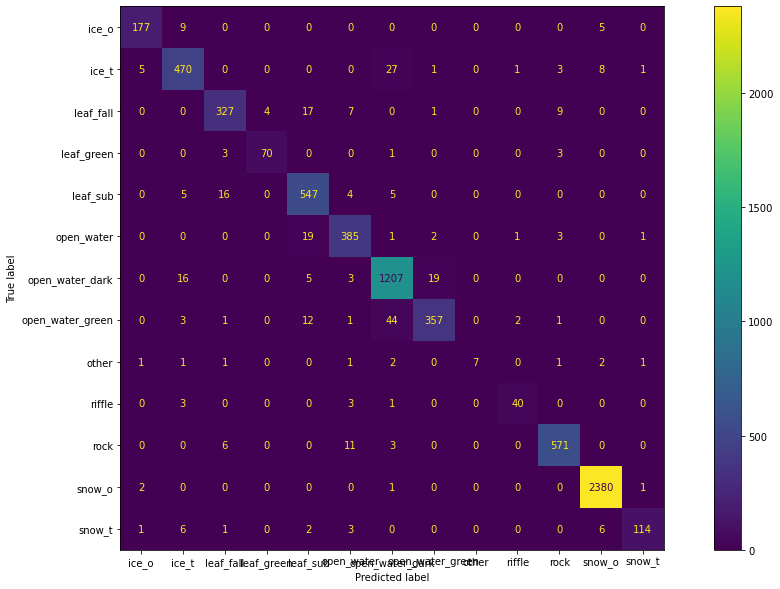

In [15]:
# using x,y,RGB, temp
train_merged_2 = sample_merged[["x","y","R","G","B", "temperature", 'year', 'week', 'month', 'season',"class"]]
rfc, rfc_pred,feature_val,  X_train, X_test, y_train, y_test = split_fit_basic_report(train_merged_2)
plot_cm(y_test, rfc_pred)

In [21]:
n_cpus = os.cpu_count()
# grid search create dict
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 10, cv = 5,
                               verbose=4,
                               random_state=42, n_jobs = n_cpus-1,
                               scoring = "accuracy")

In [22]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=7,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, scoring='accuracy', verbose=4)

In [23]:
rf_random.best_params_

{'n_estimators': 928,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': False}

In [24]:
# training error
print (rf_random.score(X_train, y_train))
# testing error
print(rf_random.score(X_test, y_test))

0.9958246346555324
0.9495774244377596


In [9]:
# build up on the randomized cv search and find better params

param_grid = {
    'n_estimators': np.linspace(920, 930, 2, dtype = int),
    'max_depth': [30, 50],
    'min_samples_split': [10,12],
    'min_samples_leaf': [1, 2]
}

# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = False)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 2, n_jobs = n_cpus-1, verbose = 3)


In [25]:
grid_rf_search.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy'),
             n_jobs=7,
             param_grid={'max_depth': [30, 50], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': array([920, 923, 926, 930, 933, 936, 940, 943, 946, 950])},
             verbose=3)

In [26]:
best_rf_grid_2 = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 920}

In [27]:
# training error
print (grid_rf_search.score(X_train, y_train))
# testing error
print(grid_rf_search.score(X_test, y_test))

0.9984649392115927
0.9528720813637015


In [29]:
pd.DataFrame(best_rf_grid_2.feature_importances_, index = X_train.columns)

,0
x,0.066226
y,0.097843
R,0.110026
G,0.114799
B,0.229621
temperature,0.066656
year,0.076388
week,0.118988
month,0.066190
season,0.053262


In [ ]:
# final accuracy of 95.2%